In [1]:
#Installing Packages
using Pkg
Pkg.add("InteractiveDynamics")
Pkg.add("DynamicalSystems")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
#Importing Libraries
using InteractiveDynamics, DynamicalSystems, DifferentialEquations, Plots


### dx/dt=σ(y−x )
### dy/dt=rx−y−xz 
### dz/dt=xy−bz 

In [3]:
function lorentz!(du,u,p,t)
    x,y,z = u
    sigma,rho,beta = p
    
    du[1] = sigma*(y - x)
    du[2] = rho*x - y - x*z
    du[3] = x*y - beta*z
    
    return nothing
end

lorentz! (generic function with 1 method)

In [4]:
initial = [1.0,0.0,0.0]
parameters = [10.0,28.0,8/3]
time_span = (0.0,100.0)

prob = ODEProblem(lorentz!,initial,time_span,parameters)
sol = solve(prob,Euler(),dt=0.001)

retcode: Success
Interpolation: 3rd order Hermite
t: 100001-element Vector{Float64}:
   0.0
   0.001
   0.002
   0.003
   0.004
   0.005
   0.006
   0.007
   0.008
   0.009000000000000001
   0.010000000000000002
   0.011000000000000003
   0.012000000000000004
   ⋮
  99.98900000011338
  99.99000000011338
  99.99100000011339
  99.99200000011339
  99.9930000001134
  99.9940000001134
  99.99500000011341
  99.99600000011341
  99.99700000011342
  99.99800000011342
  99.99900000011343
 100.0
u: 100001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.99, 0.028, 0.0]
 [0.98038, 0.055692, 2.7720000000000002e-5]
 [0.9711331200000001, 0.0830869208238664, 8.224540296000001e-5]
 [0.9622526580082388, 0.11019548139180775, 0.00016271454253631438]
 [0.9537320862420745, 0.13702820376214558, 0.0002683165319593153]
 [0.9455650474172752, 0.16359541807107572, 0.00039828921585549897]
 [0.9377453511238132, 0.18990726737232708, 0.0005519172205255099]
 [0.9302669702862983, 0.21597371237861376, 0.00072853009

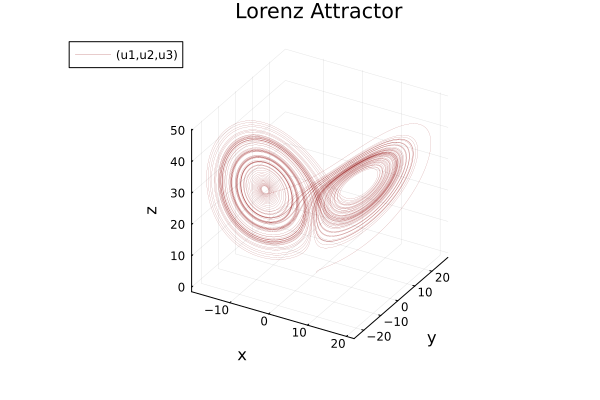

In [9]:
plot(sol, idxs=(1,2,3), xlabel="x", ylabel="y", zlabel="z", title="Lorenz Attractor", lw=0.1, color=:redsblues)